#### A quick introduction to Decision Trees using Python

### Import Packages

In [1]:
# data processing
import numpy as np
import pandas as pd

# modeling
from sklearn import tree

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Read and Plot Data

In [2]:
# let's simulate some data for this exercise

def simulate_linreg_data(rows):
    # set-up
    n_samples = rows
    np.random.seed(314)

    def true_fun(X):
        return -np.sin(2.2 * np.pi * X)

    # generate data
    x = np.sort(np.random.rand(n_samples))

    y = true_fun(x) + np.random.randn(n_samples) * 0.1
    
    return pd.DataFrame({'x': x, 'y': y})

df = simulate_linreg_data(20)

df.shape

print(df.head())

          x         y
0  0.069914 -0.346400
1  0.122291 -0.636178
2  0.260480 -1.160382
3  0.260757 -1.036982
4  0.261531 -1.048191


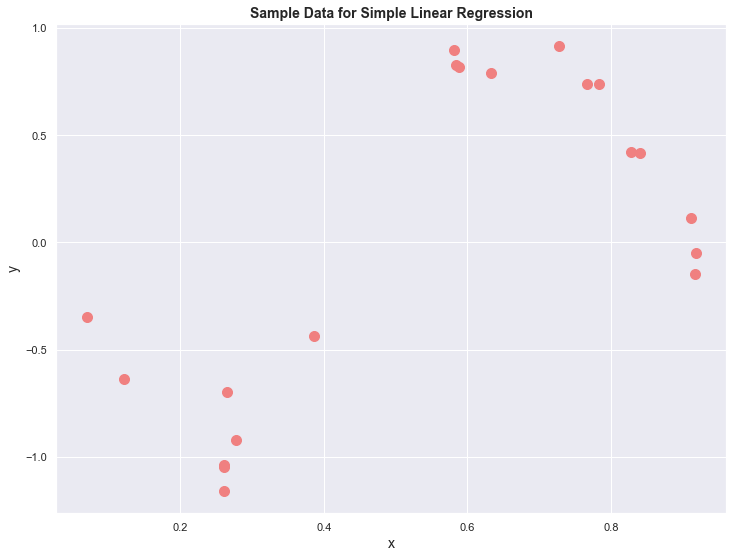

In [3]:
sns.set(style='darkgrid')

plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Sample Data for Simple Linear Regression', fontsize=14, weight='semibold');

## Decision Tree

Step 1: Create a decision tree object.

In [4]:
# max depth
max_d = 3

dtree = tree.DecisionTreeRegressor(max_leaf_nodes=max_d, random_state=314)

Step 2: Fit the model.

In [5]:
dtree.fit(df.x[:, np.newaxis], df.y)

<ipython-input-5-f40e886105c2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dtree.fit(df.x[:, np.newaxis], df.y)


DecisionTreeRegressor(max_leaf_nodes=3, random_state=314)

Step 3: Make predictions.

In [6]:
df['y_hat'] = dtree.predict(df.x[:, np.newaxis])

<ipython-input-6-5978ea885f71>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df['y_hat'] = dtree.predict(df.x[:, np.newaxis])


Plot the original data points and the predictions.

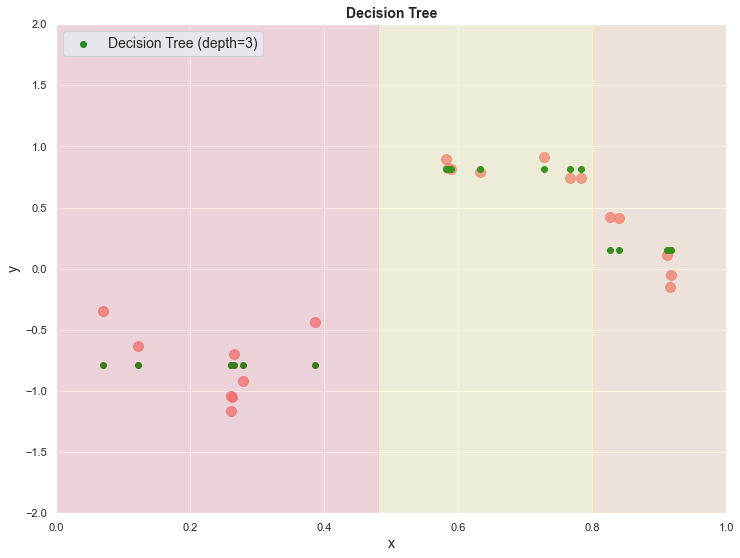

In [7]:
sns.set(style='darkgrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100, alpha=.8)
plt.scatter(df.x, df.y_hat, color='forestgreen', label=f'Decision Tree (depth={max_d})')

plt.axvspan(0, .48, alpha=0.1, color='red')
plt.axvspan(.48, .8, alpha=0.1, color='yellow')
plt.axvspan(0.8, 1, alpha=0.1, color='orange')

plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc='best', fontsize = 14)
plt.title('Decision Tree', fontsize=14, weight='semibold');

In [8]:
df[['y', 'y_hat']].head(10)

,y,y_hat
0,-0.346400,-0.785977
1,-0.636178,-0.785977
2,-1.160382,-0.785977
3,-1.036982,-0.785977
4,-1.048191,-0.785977
5,-0.699706,-0.785977
6,-0.921923,-0.785977
7,-0.438058,-0.785977
8,0.900060,0.818862
9,0.827121,0.818862


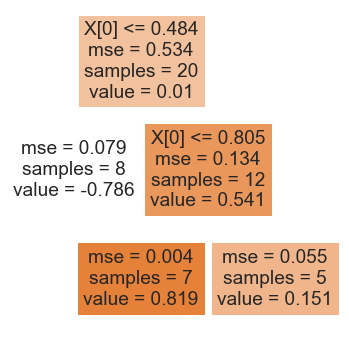

In [9]:
plt.figure().set_size_inches(6, 6)

tree.plot_tree(dtree, filled=True);

## Decision Tree model using Wine Quality data

In [10]:
df_wine = pd.read_csv(r'../data/winequality.csv', index_col=0)

# select the columns to be used as predictors in the model
num_cols = df_wine.columns[df_wine.dtypes == 'float64']

num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
# model training data
X = df_wine[num_cols]
y = df_wine.quality

# define the model object
dtree = tree.DecisionTreeRegressor(max_depth=5, random_state=314)

# fit the model
dtree_wine = dtree.fit(X, y)

# make predictions
df_wine['preds'] = dtree_wine.predict(X) #store predictions in this column

df_wine[['preds', 'quality']].head() #shows predictions vs. actual

,preds,quality
0,5.532751,6
1,5.532751,6
2,5.869565,6
3,5.802432,6
4,5.802432,6


Mean Squared Error (MSE)

In [16]:
from sklearn.metrics import mean_squared_error

mse_wine = mean_squared_error(df_wine.quality, df_wine.preds) #df_wine.quality = y, so could use y there...

mse_wine

0.4910990241269476

What happens if we build a model with the default settings...

In [17]:
dtree = tree.DecisionTreeRegressor(random_state=314)

dtree_wine = dtree.fit(df_wine[num_cols], df_wine.quality)

df_wine['preds'] = dtree_wine.predict(df_wine[num_cols])

mean_squared_error(df_wine.quality, df_wine.preds)

#this is too greedy @ 0.0...overfitting; immediate red flag

0.0

In [18]:
df_wine[['quality', 'preds']].head() #very greedy...

,quality,preds
0,6,6.0
1,6,6.0
2,6,6.0
3,6,6.0
4,6,6.0


In [19]:
dtree.get_depth()

27

This is an example of over-fitting. Decision Tree is a _greedy_ algorithm, prone to over-fitting.

## *Exercise: Decision Tree model using House Prices data* 
[Data Source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Step 1: Read data.

In [20]:
df_house = pd.read_csv('../notebooks/house_prices.csv', index_col=0)

Step 2: Define `X` and `y` using the columns specified below.

In [21]:
cols_to_use = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
               'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
               'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 
               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
               'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
               '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
               'YrSold']

target_col = 'SalePrice'

In [28]:
X = df_house[cols_to_use]

y = df_house[target_col]

X.shape, y.shape #y-shape is one-dimensional

((1460, 25), (1460,))

Step 3: Define a Decision Tree model object. Use `max_depth=5`.

In [34]:
dtree = tree.DecisionTreeRegressor(max_depth=5, random_state = 314)

Step 4: Train (fit) the model using `X` and `y`.

In [35]:
dtree.fit(X,y)

#vectors are denoted with small letters 'y' and Matrix w/ large letters "X"

DecisionTreeRegressor(max_depth=5, random_state=314)

Step 5: Make predictions using the same (training) dataset `X`.

In [36]:
df_house['preds'] = dtree.predict(X)

Step 6: Find the correction between the predicted values and the actual target values.

In [37]:
df_house.preds.corr(y)

0.9250131531671375

Step 7: Calculate MSE.

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, df_house.preds)

mse

910389135.5666152

In [39]:
mse/y.mean() #mean squared error vs mean of y-values for comparison to scale 
#(large values will have a large MSE, naturally)

5031.96505575866

In [44]:
importances = dtree.feature_importances_

importances

array([0.00000000e+00, 7.20944166e-03, 7.57102734e-01, 0.00000000e+00,
       5.64202071e-03, 6.49260031e-03, 5.92355968e-02, 4.22907487e-02,
       0.00000000e+00, 1.11340391e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.58504636e-03,
       6.34618984e-06, 0.00000000e+00, 0.00000000e+00, 4.09507453e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [42]:
cols_to_use

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [45]:
indices = np.argsort(importances)[::-1] 
#argsort variable ranked the highest is least important
#::-1 reverses string to give most important first

indices[:5]
# array([2, 9, 6, 7, 1], dtype=int64) best variable is on the 2nd place. 
#  2nd is best...9 is second)

array([2, 9, 6, 7, 1], dtype=int64)

In [51]:
# print the feature ranking
for f in range(X.shape[1]):
    imp = importances[indices[f]]
    col = X.columns[indices[f]]
    if imp > 0:
        print(f'{f+1}. feature {col} ({imp:.3})')

1. feature OverallQual (0.757)
2. feature GrLivArea (0.111)
3. feature 1stFlrSF (0.0592)
4. feature 2ndFlrSF (0.0423)
5. feature LotArea (0.00721)
6. feature Fireplaces (0.00659)
7. feature YearRemodAdd (0.00649)
8. feature YearBuilt (0.00564)
9. feature 3SsnPorch (0.0041)
10. feature WoodDeckSF (6.35e-06)


### Feature Importance